<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

## **Tugas *2*: *Clustering***

### **Tenggat Waktu: 12 Oktober 2021, 23.55 WIB**
</center>

#### **Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama.ipynb**. Contoh: F_Tugas2_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **12 Oktober 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [2]:
# Isi dengan data diri Anda
NAMA = "Muhammad Irfan Junaidi"
KELAS = "A"
NPM = "1906293202"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = [
    "1906292925",
    "1906308500",
]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    "https://medium.com/@fauziyahdewi16/k-means-clustering-with-scikit-learn-in-python-b8e7835d9753",
    "https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means",
]

In [3]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Irfan Junaidi dari kelas A dengan NPM 1906293202, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Irfan Junaidi)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances, silhouette_score
from sklearn.preprocessing import StandardScaler

# **Soal 1 [15 Poin] - Teori**

## a. Jelaskan mengapa K-means clustering tidak cocok untuk yang bukan hyper-spheres?

> Karena dalam menentukan suatu cluster, K-means menggunakan centroid yang didapat dengan menghitung rata-rata jarak euclidean. Hal tersebut membuat K-means sensitif terhadap outlier. Data-data yang berkumpul membentuk suatu elipsoid akan cenderung dibuat dalam satu cluster dengan K-means. Namun, apabila data tidak berbentuk hyper-sphere, K-means tetap dapat membuat cluster, hanya saja cluster mungkin tidak sesuai dengan apa yang diharapkan, kembali lagi karena K-means menentukan penentuan suatu titik masuk ke cluster mana dengan menghitung jarak dengan centroid.

## b. Jelaskan mengapa algoritma Hierarchical clustering dapat digunakan tanpa perlu menetapkan jumlah cluster?


> Karena hierarchical clustering dilakukan dengan mengelompokkan data-data yang mirip ke dalam suatu cluster yang sama. Hal ini dilakukan hingga didapatkan satu cluster besar yang berisi seluruh data yang ada. Hasil akhir dari hierarchical clustering adalah suatu set yang berisi cluster-cluster yang terbentuk

## c. Jelaskan apa itu nilai metrik intra-class similarity dan cara menghitungnya!


> Intra-class similarity adalah jarak suatu data-point dengan data-point lainnya dalam cluster yang sama. <br>
Intra-class similarity dapat dihitung dengan rumus: <br>
$$a(o) = \frac{1}{|C(o)|}\sum\limits_{p \in C(o)}{d(o,p)}$$
> Dengan C(o) merupakan cluster lain dan d(o,p) merupakan fungsi untuk menghitung jarak antara dua data-point dari cluster berbeda.

## d. Jelaskan apa itu nilai metrik inter-class similarity dan cara menghitungnya!

> Intra-class similarity adalah jarak suatu data-point dengan centroid dalam cluster yang berbeda. <br>
Inter-class similarity dapat dihitung dengan rumus: <br>
$$b(o) = \frac{1}{|C_i|}\sum\limits_{p \in C_i}{d(o,p)}$$
> Dengan C<sub>i</sub> merupakan cluster yang sedang diperiksa dan d(o,p) merupakan fungsi untuk menghitung jarak antara data-point yang sedang diperiksa dengan centroid.

# **Soal 2 [40 Poin] - Guess the clustering**

## a. Buka data dari soal2.csv dan plot semua titik di plot dua dimensi!


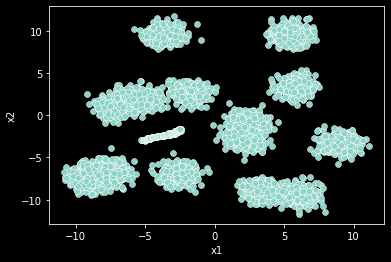

In [5]:
soal2 = pd.read_csv('soal2.csv')

sns.scatterplot(data=soal2, x="x1", y="x2")
plt.show()

## b. Dari plot tersebut, usulkan jumlah klaster yang dapat membagi data dengan baik!


> 12

## c. Gunakan sebuah algoritma clustering yang dapat membagi data sesuai dengan jumlah klaster yang Anda usulkan. Jelaskan mengapa algoritma clustering tersebut digunakan! Catatan: Jawaban seperti karena “K-Means bisa/baik dipakai untuk clustering” tidak cukup. Semua algoritma clustering bisa dipakai untuk clustering. Tapi kenapa itu?


In [6]:
kmeans = KMeans(n_clusters=12, random_state=123)

kmeans.fit(soal2)

KMeans(n_clusters=12, random_state=123)

> Dipilih K-Means clustering karena ingin dibuat sebanyak K cluster. K-Means clustering juga merupakan metode clustering yang paling umum digunakan.

## d. Visualisasikan hasil clustering dengan menampilkan scatter plot data yang di color-coded berdasarkan klasternya. Selain itu, cetak jumlah cluster yang dihasilkan! Hint: Pelajari parameter c pada fungsi matplotlib.pyplot.scatter()


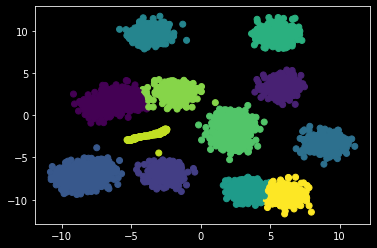

Centroid cluster:
[[-6.29676083  1.48559383]
 [ 5.83385993  3.38649633]
 [-2.58993935 -6.95550359]
 [-8.41530383 -7.09145722]
 [ 9.0075752  -3.35449517]
 [-3.63629637  9.5436219 ]
 [ 3.436834   -8.86598355]
 [ 5.43172788  9.61722608]
 [ 2.29927042 -1.78207179]
 [-1.9371943   2.6875745 ]
 [-3.6607839  -2.34741039]
 [ 6.10499883 -9.4616713 ]]
Jumlah cluster: 12


In [7]:
plt.scatter(data=soal2, x="x1", y="x2", c=kmeans.labels_)
plt.show()

print(f"Centroid cluster:\n{kmeans.cluster_centers_}")
print(f"Jumlah cluster: {len(kmeans.cluster_centers_)}")

## e. Hitung nilai intra-class similarity hasil clustering tersebut dengan menghitung jumlah dari jarak (sum of distance) masing-masing sampel dengan pusat klasternya! Koordinat sebuah pusat klaster adalah rata-rata dari semua sampel di klaster tersebut. Rumus jarak yang digunakan adalah L2-norm/Euclidean Distance.


In [ ]:
centers = kmeans.cluster_centers_
result = 0
for i in range(len(kmeans.cluster_centers_)):
    sum = 0
    cluster = soal2[kmeans.labels_ == i]
    for j in range(len(cluster)):
        x1 = centers[i][0] - cluster.iloc[j][0]
        x2 = centers[i][1] - cluster.iloc[j][1]
        sum += np.sqrt(x1**2 + x2**2)
    result += sum / len(cluster)

print(result/len(kmeans.cluster_centers_))

0.9561169840178617


## f. Hitung nilai silhouette coefficient dari hasil clustering tersebut!

In [ ]:
silhouette_score(soal2, kmeans.labels_)

0.7038401303312355

# **Soal 3 [30 Poin] - Hierarchical Clustering**

## a. Buka data dari soal3.csv dan plot semua titik di plot dua dimensi


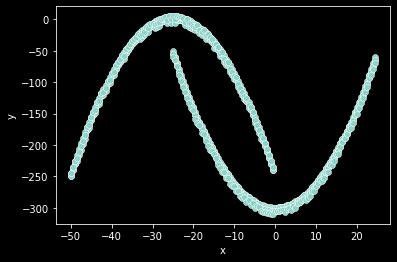

In [ ]:
soal3 = pd.read_csv('soal3.csv')

sns.scatterplot(data=soal3, x="x", y="y")
plt.show()

## b. Pada soal ini, anda diharapkan melakukan clustering menggunakan algoritma Agglomerative

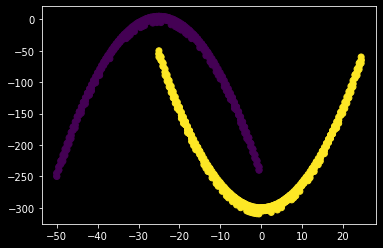

In [ ]:
aggCluster = AgglomerativeClustering(linkage="single")

aggCluster.fit(soal3)

plt.scatter(data=soal3, x="x", y="y", c=aggCluster.labels_)
plt.show()

## c. Kemungkinan besar saat Anda menggunakan modul algoritma Agglomerative dari library sklearn, Anda harus mengubah parameter yang digunakan. Sebutkan parameter apa saja yang anda gunakan beserta nilainya, dan jelaskan alasan anda menggunakan parameter tersebut dan menggunakan nilai tersebut.

> Parameter yang diubah adalah Linkage dengan value menjadi **single** yang tadinya memiliki default value **ward**. Parameter Linkage mengatur bagaimana ditentukannya jarak antar cluster. Mengubah Parameter Linkage menjadi **single** membuat perhitungan jarak antar cluster dilakukan dengan jarak terpendek pada dua titik dalam cluster berbeda. Sehingga pada soal di atas karena terdapat gap yang cukup besar, data tidak termasuk pada cluster yang satunya.

## d. (Bonus) Lakukan clustering menggunakan K-Means pada data tersebut, visualisasikan hasilnya, kemudian lakukan analisis terhadap hasil tersebut.

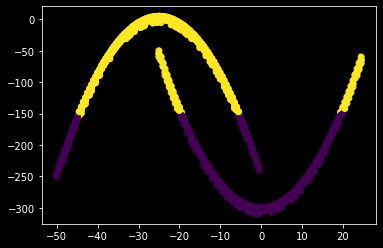

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=123)

kmeans2.fit(soal3)

plt.scatter(data=soal3, x="x", y="y", c=kmeans2.labels_)
plt.show()

> K-Means melakukan clustering dengan memanfaatkaan centroid, yang menjadi titik untuk menentukan apakah suatu titik merupakan cluster dari centroid tersebut. Penentuan cluster ditentukan dengan menghitung sum squared error titik tersebut dengan centroid, sehingga meskipun datanya tidak 'menempel', akan tetap dianggap sebagai clusternya.

# **Soal 4 [20 Poin] - Which came first: dimensionality reduction or clustering?**

## a. Buka data dari soal4.csv dan tampilkan 10 baris pertama! Hitung jumlah data dan jumlah fitur!


In [ ]:
soal4 = pd.read_csv('soal4.csv')

display(soal4.head(10))

print(f"Jumlah Data: {soal4.shape[0]}")
print(f"Jumlah Fitur: {soal4.shape[1]}")

,A,B,E
0,0.470839,-0.978228,-4.981786
1,-0.079349,-0.798295,-5.173138
2,0.698990,-1.925331,-5.955414
3,1.246046,-0.125634,-6.029880
4,0.570842,-0.672183,-4.181259
5,0.325580,-1.389908,-2.461709
6,0.721706,-0.615033,-5.444958
7,0.793625,-0.781055,-5.084923
8,0.576666,0.001895,-6.165497
9,0.907629,-0.650638,-6.290293


Jumlah Data: 1000
Jumlah Fitur: 3


## b. Ikuti langkah-langkah berikut:
### i. Salin data asli dan masukkan dalam variable data_copy_1!
### ii. Lakukan Dimensionality reduction (PCA) pada data_copy_1 sehingga jumlah fiturnya menjadi 2!
### iii. Visualisasikan data_copy_1 yang sudah direduksi, kemudian tentukan berapa jumlah cluster yang tepat!
### iv. Lakukan clustering pada data_copy_1 yang sudah direduksi menggunakan K-Means dengan parameter random_state=2021!
### v. Visualisasikan hasil clustering pada data_copy_1 yang sudah direduksi!


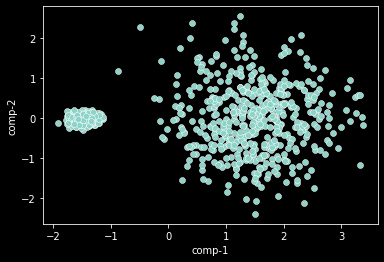

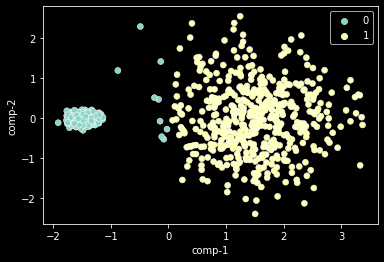

In [ ]:
data_copy_1 = pd.DataFrame(data=soal4, columns=soal4.columns)
X1_std = StandardScaler().fit_transform(data_copy_1)

# PCA
pca = PCA(n_components=2)
skl_pca = pca.fit_transform(X1_std)

# PCA Plot
data_1_red = pd.DataFrame()
data_1_red["comp-1"] = skl_pca[:,0]
data_1_red["comp-2"] = skl_pca[:,1]
sns.scatterplot(data=data_1_red, x="comp-1", y="comp-2")
plt.show()

# K-Means
kmeans3 = KMeans(n_clusters=2, random_state=2021)
kmeans3.fit(data_1_red)

sns.scatterplot(data=data_1_red, x="comp-1", y="comp-2", hue=kmeans3.labels_)
plt.show()

## c. Ikuti langkah-langkah berikut:
### i. Salin data asli dan masukkan dalam variable data_copy_2!
### ii. Lakukan clustering pada data_copy_2 menggunakan K-Means dengan parameter random_state=2021 dan jumlah cluster sama dengan jumlah cluster yang kamu gunakan pada poin b!
### iii. Lakukan Dimensionality reduction (PCA) pada data_copy_2 sehingga jumlah fiturnya menjadi 2!
### iv. Visualisasikan hasil clustering pada data_copy_2 yang sudah direduksi!


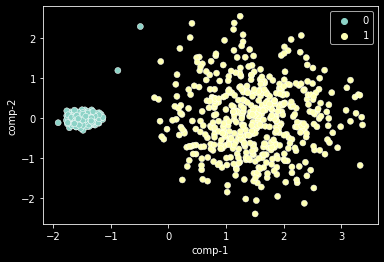

In [ ]:
data_copy_2 = pd.DataFrame(data=soal4, columns=soal4.columns)

# K-Means
kmeans4 = KMeans(n_clusters=2, random_state=2021)
kmeans4.fit(data_copy_2)

X2_std = StandardScaler().fit_transform(data_copy_2)

# PCA
pca = PCA(n_components=2)
skl_pca = pca.fit_transform(X2_std)

# PCA Plot
data_2_red = pd.DataFrame()
data_2_red["comp-1"] = skl_pca[:,0]
data_2_red["comp-2"] = skl_pca[:,1]
sns.scatterplot(data=data_2_red, x="comp-1", y="comp-2", hue=kmeans4.labels_)
plt.show()

## d. Apakah ada perbedaan pada hasil poin b dan poin c? Mengapa demikian? Apa kesimpulan yang bisa anda ambil?

> Terdapat sedikit perbedaan pada hasil poin b dan poin c. Karena pada dimensi yang berbeda, perhitungan jarak memperhitungkan semua axis sehingga dapat suatu titik dapat berada pada cluster berbeda apabila dilakukan dimensionality reduction. Dapat disimpulkan bahwa K-means dapat dilakukan pada dimensi lebih dari 2, namun hasilnya akan berbeda apabila dilakukan clustering sebelum dimensionality reduction dengan dilakukan dimensionality reduction sebelum clustering.